In [2]:
#installing the latest version of tensorflow
!pip install tensorflow

#verify the installation

import tensorflow as tf
from tensorflow import keras

In [38]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

In [39]:
# Loading MNIST dataset
mnist = keras.datasets.mnist

#Splitting into train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [40]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


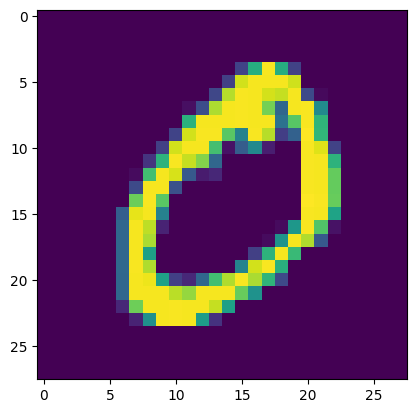

In [41]:
plt.imshow(X_train[1])

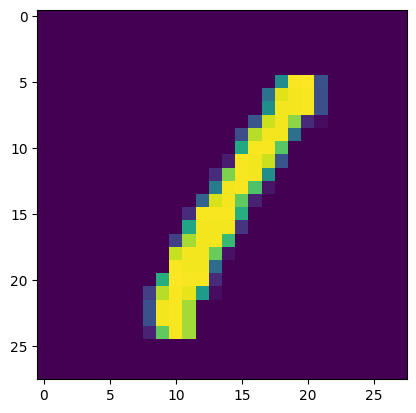

In [42]:
plt.imshow(X_train[3])

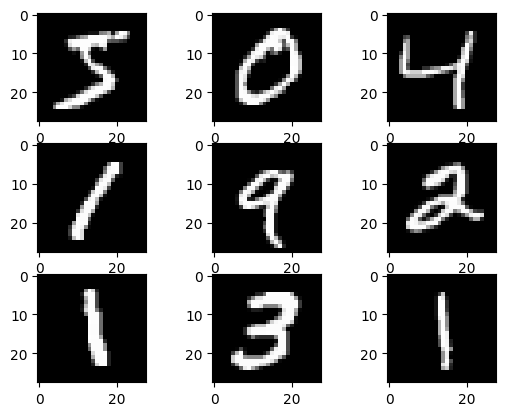

In [44]:
for i in range(9):
  plt.subplot(330 +  1 + i)
  plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
plt.show()

In [5]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784.
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

# Data is converted into float32 to use 32-bit precision # when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_1 = Sequential()

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

In [18]:
# Compiling the model.
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Training the model.
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 3s 3ms/step - loss: 1.0888 - accuracy: 0.7474 - val_loss: 0.6578 - val_accuracy: 0.8551
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6094 - accuracy: 0.8528 - val_loss: 0.5089 - val_accuracy: 0.8786
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5133 - accuracy: 0.8694 - val_loss: 0.4506 - val_accuracy: 0.8882
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4667 - accuracy: 0.8779 - val_loss: 0.4179 - val_accuracy: 0.8925
Epoch 5/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4380 - accuracy: 0.8834 - val_loss: 0.3968 - val_accuracy: 0.8965
Epoch 6/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4181 - accuracy: 0.8876 - val_loss: 0.3818 - val_accuracy: 0.8994
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4032 - accuracy: 0.8905 - val_loss: 0.3706 - val_accuracy: 0.9006
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


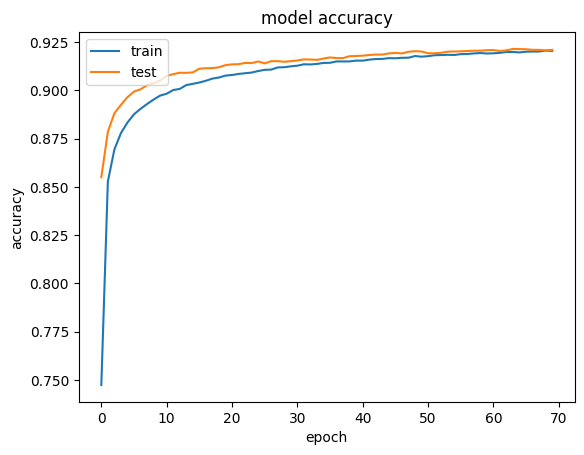

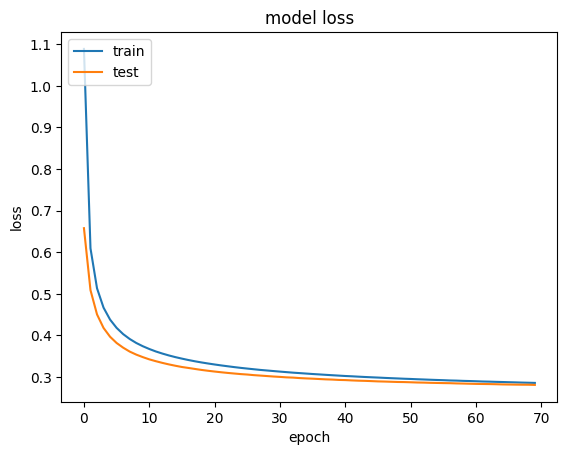

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2836 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


In [23]:
model_1.get_config()

{'name': 'sequential_2',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'bu

In [24]:
#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:

model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 8s 9ms/step - loss: 1.0121 - accuracy: 0.7328 - val_loss: 0.4624 - val_accuracy: 0.8788
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4178 - accuracy: 0.8855 - val_loss: 0.3417 - val_accuracy: 0.9037
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3446 - accuracy: 0.9024 - val_loss: 0.2992 - val_accuracy: 0.9140
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.3083 - accuracy: 0.9124 - val_loss: 0.2758 - val_accuracy: 0.9202
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2838 - accuracy: 0.9191 - val_loss: 0.2560 - val_accuracy: 0.9260
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2643 - accuracy: 0.9250 - val_loss: 0.2438 - val_accuracy: 0.9279
Epoch 7/100
750/750 [==============================] - 3s 5ms/step - loss: 0.2481 - accuracy: 0.9293 - val_loss: 0.2291 - val_accuracy: 0.9339

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


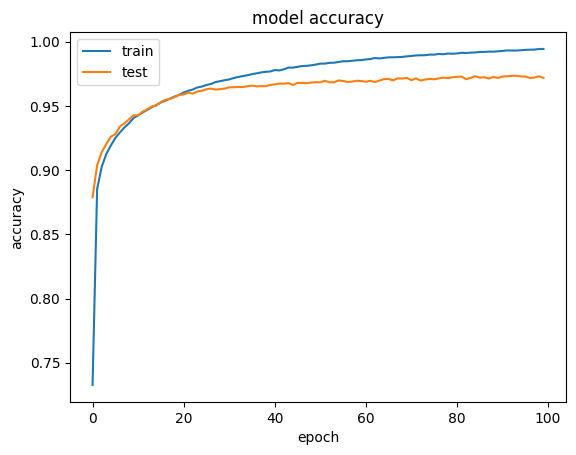

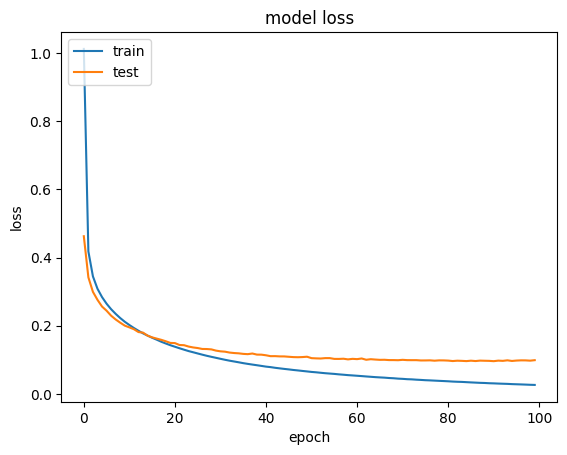

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.2836 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


In [27]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
N_hidden = 128


# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

#Adding a dropout layer to avoid the overfitting
model_3.add(Dropout(0.3))

# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_3.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
training = model_3.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 5s 5ms/step - loss: 1.3032 - accuracy: 0.5855 - val_loss: 0.5289 - val_accuracy: 0.8642
Epoch 2/50
750/750 [==============================] - 4s 6ms/step - loss: 0.6475 - accuracy: 0.8006 - val_loss: 0.3740 - val_accuracy: 0.8980
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.5121 - accuracy: 0.8473 - val_loss: 0.3167 - val_accuracy: 0.9107
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4515 - accuracy: 0.8671 - val_loss: 0.2835 - val_accuracy: 0.9184
Epoch 5/50
750/750 [==============================] - 4s 6ms/step - loss: 0.4065 - accuracy: 0.8806 - val_loss: 0.2596 - val_accuracy: 0.9259
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3735 - accuracy: 0.8912 - val_loss: 0.2417 - val_accuracy: 0.9299
Epoch 7/50
750/750 [==============================] - 3s 5ms/step - loss: 0.3505 - accuracy: 0.8971 - val_loss: 0.2270 - val_accuracy: 0.9342
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


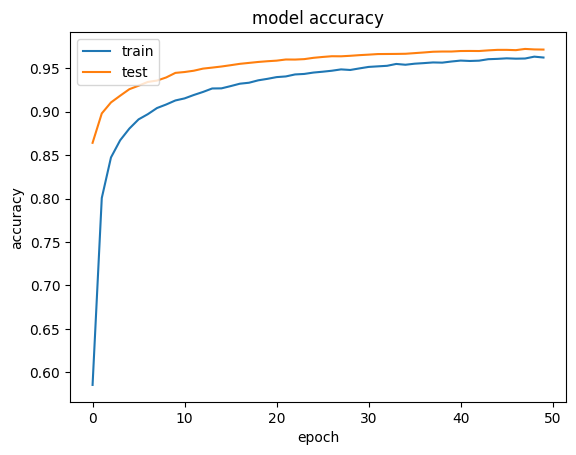

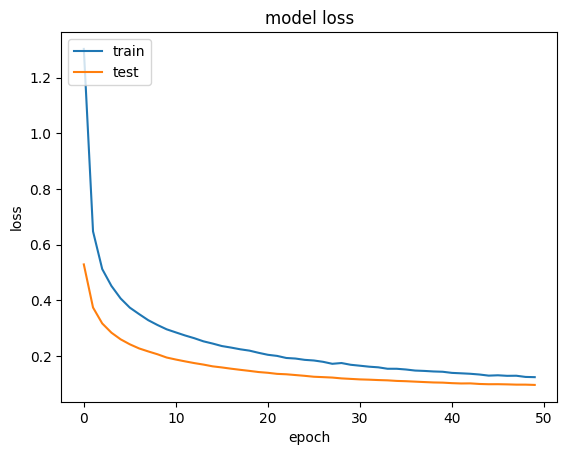

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.9732
Test accuracy: 0.9732000231742859


In [30]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model.
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2)


Epoch 1/31
375/375 [==============================] - 9s 22ms/step - loss: 0.3056 - accuracy: 0.9079 - val_loss: 0.1224 - val_accuracy: 0.9637
Epoch 2/31
375/375 [==============================] - 8s 20ms/step - loss: 0.1262 - accuracy: 0.9613 - val_loss: 0.0923 - val_accuracy: 0.9717
Epoch 3/31
375/375 [==============================] - 8s 21ms/step - loss: 0.0880 - accuracy: 0.9722 - val_loss: 0.0868 - val_accuracy: 0.9750
Epoch 4/31
375/375 [==============================] - 8s 22ms/step - loss: 0.0742 - accuracy: 0.9766 - val_loss: 0.0804 - val_accuracy: 0.9762
Epoch 5/31
375/375 [==============================] - 7s 19ms/step - loss: 0.0590 - accuracy: 0.9809 - val_loss: 0.0810 - val_accuracy: 0.9768
Epoch 6/31
375/375 [==============================] - 8s 22ms/step - loss: 0.0501 - accuracy: 0.9837 - val_loss: 0.0788 - val_accuracy: 0.9776
Epoch 7/31
375/375 [==============================] - 8s 22ms/step - loss: 0.0450 - accuracy: 0.9855 - val_loss: 0.0783 - val_accuracy: 0.9780

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


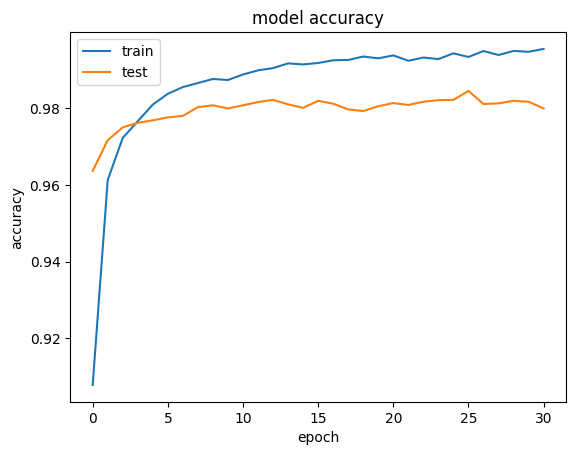

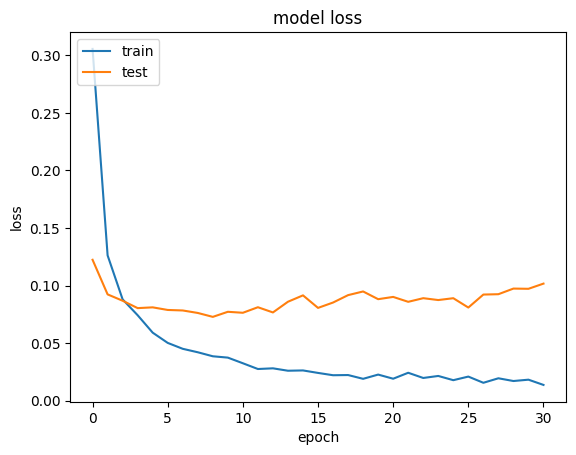

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0834 - accuracy: 0.9836
Test accuracy: 0.9836000204086304
